In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
Test = pd.read_csv('./data/DailyDelhiClimateTest.csv')

In [25]:
Test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [26]:
Train = pd.read_csv('./data/DailyDelhiClimateTrain.csv')

In [27]:
Train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [28]:
Train.shape

(1462, 5)

In [29]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [8]:
X_train = Train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
X_train = MinMaxScaler(X_train)

y_train = X_train[['meantemp']]
X_train = X_train[['humidity', 'wind_speed', 'meanpressure']]

X_train

,humidity,wind_speed,meanpressure
0,0.820957,0.000000,0.132603
1,0.907591,0.070583,0.132881
2,0.849835,0.109743,0.132994
3,0.668867,0.029212,0.132799
4,0.847910,0.087636,0.132712
...,...,...,...
1457,0.630865,0.084032,0.132590
1458,0.859736,0.142113,0.132764
1459,0.880638,0.148429,0.132895
1460,0.849835,0.173496,0.132660


In [9]:
X_test = Test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
X_test = MinMaxScaler(X_test)

y_test = X_test[['meantemp']]
X_test = X_test[['humidity', 'wind_speed', 'meanpressure']]

X_test

,humidity,wind_speed,meanpressure
0,0.872396,0.075640,0.000000
1,0.761651,0.084061,0.995298
2,0.821416,0.146661,0.995356
3,0.669797,0.176133,0.992624
4,0.732480,0.106684,0.991206
...,...,...,...
109,0.124867,0.232892,0.974907
110,0.276948,0.310987,0.976204
111,0.296478,0.418508,0.977994
112,0.124867,0.478334,0.978539


In [10]:
time_step = 7
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [11]:
train_X, train_y = create_dataset(X_train, y_train, time_step, step)

train_X.shape, train_y.shape

((1455, 7, 3), (1455, 1))

In [12]:
test_X, test_y = create_dataset(X_test, y_test, time_step, step)
test_X.shape, test_y.shape

((107, 7, 3), (107, 1))

In [13]:
n_timesteps,n_features,n_outputs=train_X.shape[1],train_X.shape[2],train_y.shape[1]

In [14]:
n_timesteps, n_features, n_outputs

(7, 3, 1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM

In [19]:
model = Sequential([
    LSTM(10, activation='relu', input_shape=(n_timesteps, n_features)),
    Flatten(),
    Dense(10, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                560       
                                                                 
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='mse', optimizer='adam')

In [22]:
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split=(0.1), shuffle=False)

Epoch 1/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.0338
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.0340
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0332 - val_loss: 0.0340
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0327 - val_loss: 0.0341
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0320 - val_loss: 0.0343
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0327 - val_loss: 0.0340
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.0338
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.0339
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.0338
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0325 - val_loss: 0.0341
Epoch 11/

41/41 [==============================] - 0s 4ms/step - loss: 0.0323 - val_loss: 0.0339
Epoch 84/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0317 - val_loss: 0.0342
Epoch 85/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0318 - val_loss: 0.0338
Epoch 86/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0322 - val_loss: 0.0336
Epoch 87/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0324 - val_loss: 0.0337
Epoch 88/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0325 - val_loss: 0.0337
Epoch 89/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0316 - val_loss: 0.0338
Epoch 90/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0318 - val_loss: 0.0339
Epoch 91/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.0337
Epoch 92/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0320 - val_loss: 0.0339
Epoch 93/100


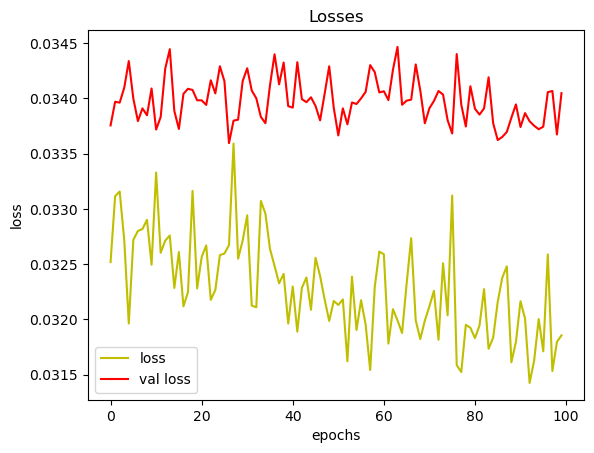

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [32]:

y_pred = model.predict(test_X)

4/4 [==============================] - 0s 2ms/step


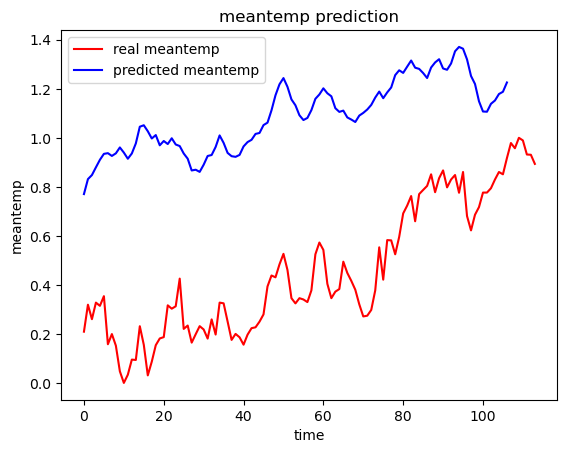

In [34]:
y_pred.shape

plt.plot(y_test, color='red', label='real meantemp')
plt.plot(y_pred, color='blue', label='predicted meantemp')
plt.title('meantemp prediction')
plt.xlabel('time')
plt.ylabel('meantemp')
plt.legend()
plt.show()